In [56]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# cargamos data
walking_dead_data=pd.read_csv('walking_dead_episodes_2.csv', encoding='ISO-8859-1')

In [39]:
# corroboramos el cargado de datos
walking_dead_data

,Season,Episode,Episode(overall),Title,Directed by,Written by,Original Air date,US viewers(millions),Overall Episode,Original Air Date
0,1,1,1,Days Gone Bye,Frank Darabont,Teleplay by: Frank Darabont,10/31/2010,5.35,1,2010-10-31
1,1,2,2,Guts,Michelle MacLaren,Frank Darabont,11/7/2010,4.71,2,2010-11-07
2,1,3,3,Tell It to the Frogs,Gwyneth Horder-Payton,Story by: Charles H. Eglee & Jack LoGiudice & ...,11/14/2010,5.07,3,2010-11-14
3,1,4,4,Vatos,Johan Renck,Robert Kirkman,11/21/2010,4.75,4,2010-11-21
4,1,5,5,Wildfire,Ernest Dickerson,Glen Mazzara,11/28/2010,5.56,5,2010-11-28
...,...,...,...,...,...,...,...,...,...,...
164,11,12,165,The Lucky Ones,Tawnia McKiernan,Vivian Tse,3/13/2022,1.58,12,2022-03-13
165,11,13,166,Warlords,Loren Yaconelli,Jim Barnes & Erik Mountain,3/20/2022,1.79,13,2022-03-20
166,11,14,167,The Rotten Core,Marcus Stokes,Erik Mountain & Jim Barnes,3/27/2022,1.55,14,2022-03-27
167,11,15,168,Trust,Lily Mariye,Kevin Deiboldt,4/3/2022,1.67,15,2022-04-03


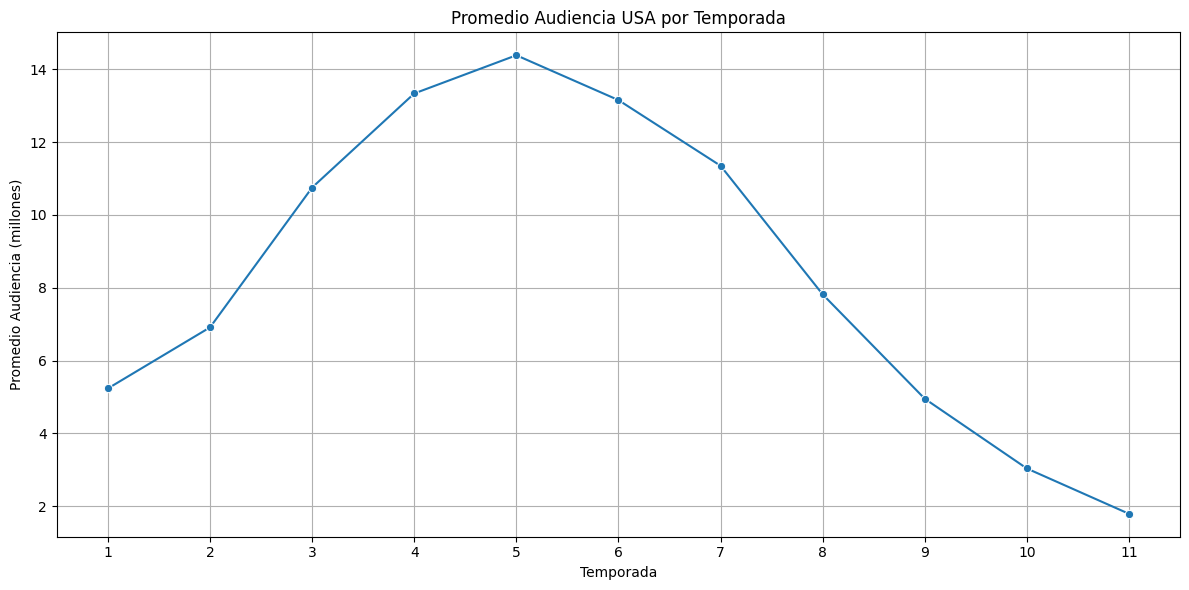

In [40]:
# Preparación de los datos para visualización
# Agrupación de datos por temporada y cálculo de la audiencia promedio
season_audience = walking_dead_data.groupby('Season')['US viewers(millions)'].mean().reset_index()

# Creando un gráfico de línea para la audiencia promedio por temporada
plt.figure(figsize=(12, 6))
sns.lineplot(x='Season', y='US viewers(millions)', data=season_audience, marker='o')
plt.title('Promedio Audiencia USA por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio Audiencia (millones)')
plt.grid(True)
plt.xticks(season_audience['Season'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Notamos un aumento desde la temporada 1 hasta el peak en la temporada 4, 5 y 6, y bajada en la audiencia promedio por temporada luego de la 
# temporada 6, pudiendo estar asociado a la muerte de 2 personajes importantes.

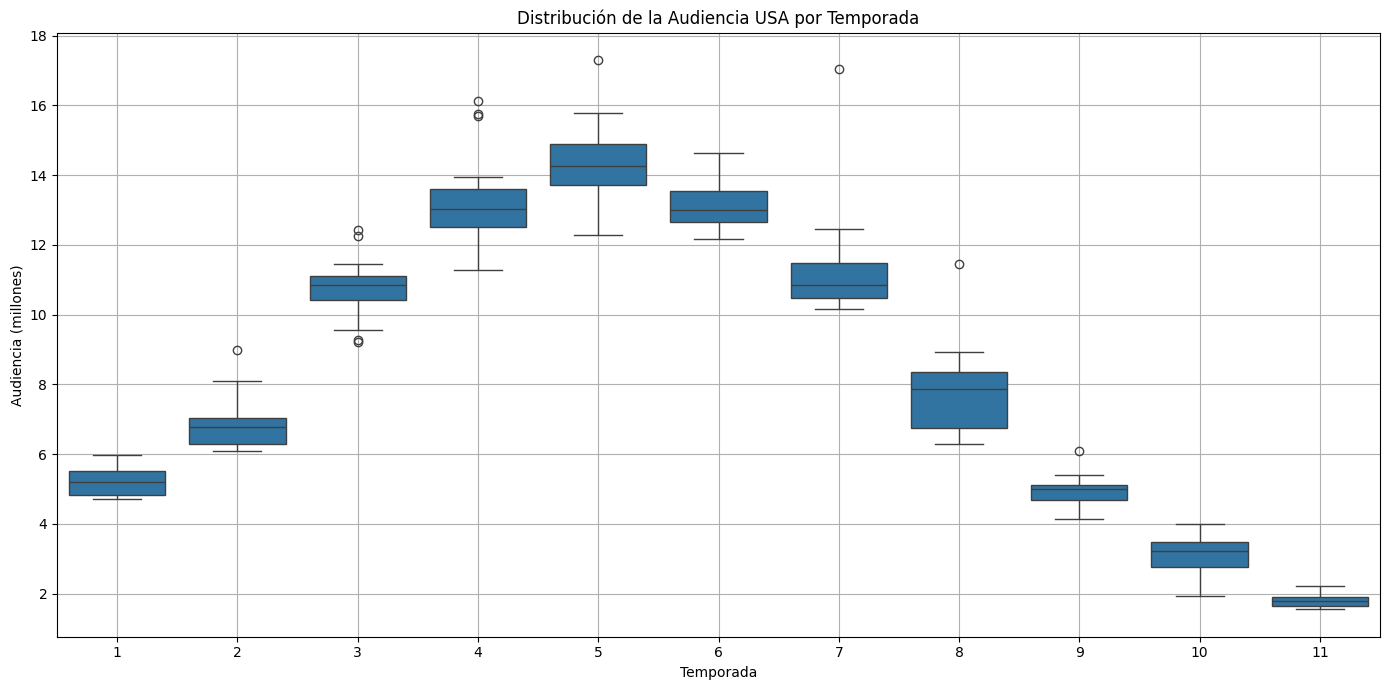

In [41]:
# Distribución de la audiencia para cada episodio a lo largo de todas las temporadas.

# Creando un gráfico de cajas para mostrar la distribución de la audiencia por temporada
plt.figure(figsize=(14, 7))
sns.boxplot(x='Season', y='US viewers(millions)', data=walking_dead_data)
plt.title('Distribución de la Audiencia USA por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Audiencia (millones)')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# distribución (variabilidad) de los episodios

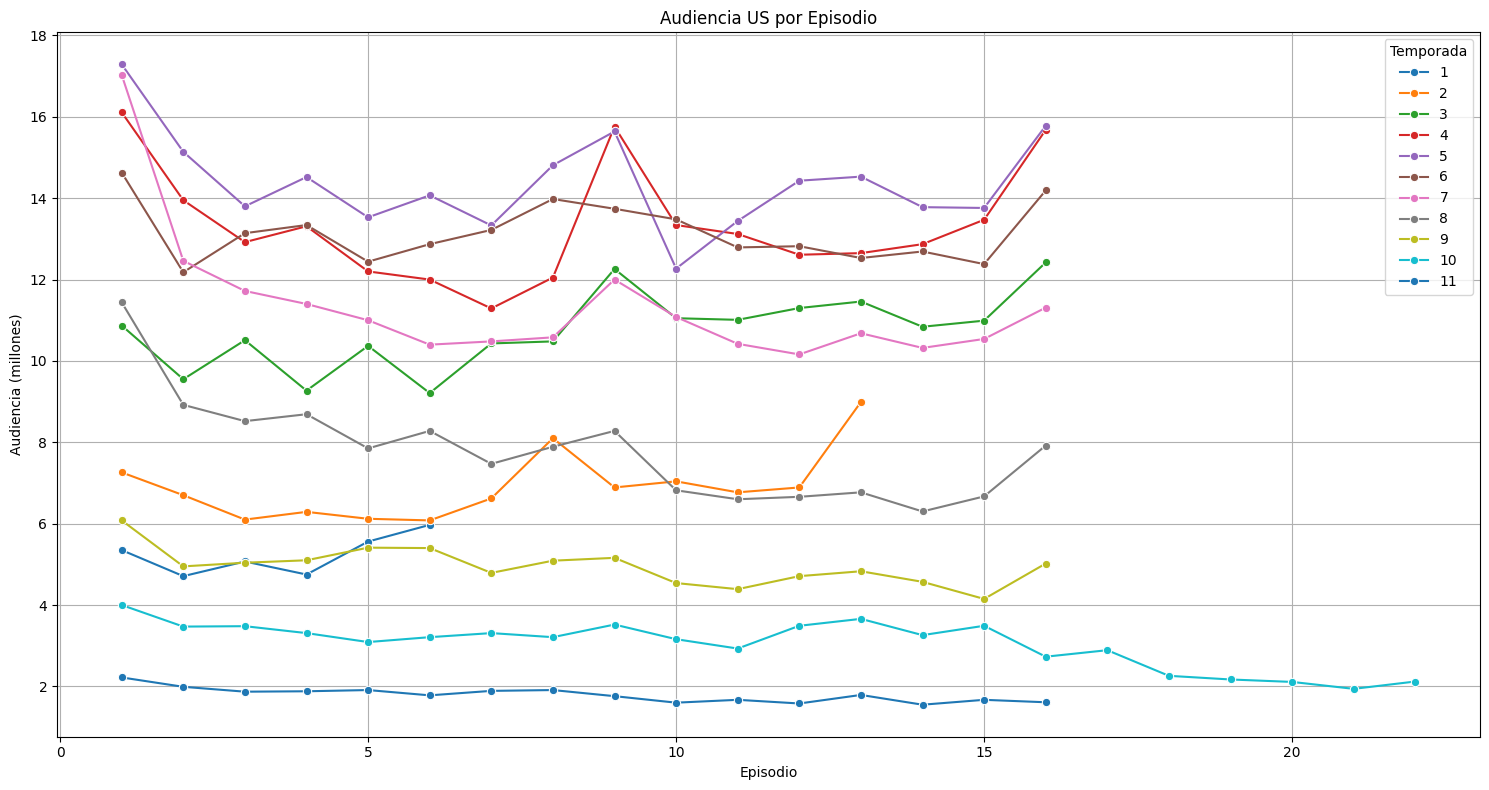

In [42]:
# Visualización de la evolución de la audiencia a lo largo de cada episodio

# Primero, crearemos una nueva columna que represente el orden general de los episodios
walking_dead_data['Overall Episode'] = walking_dead_data.groupby('Season').cumcount() + 1

# Ahora, crearemos un gráfico de línea para mostrar la audiencia de cada episodio a lo largo de todas las temporadas
plt.figure(figsize=(15, 8))
sns.lineplot(x='Overall Episode', y='US viewers(millions)', hue='Season', data=walking_dead_data, palette="tab10", marker='o')
plt.title('Audiencia US por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Audiencia (millones)')
plt.grid(True)
plt.legend(title='Temporada')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# con este grafico podemos observar la audiencia a lo largo de las temporadas, notando las mas populares

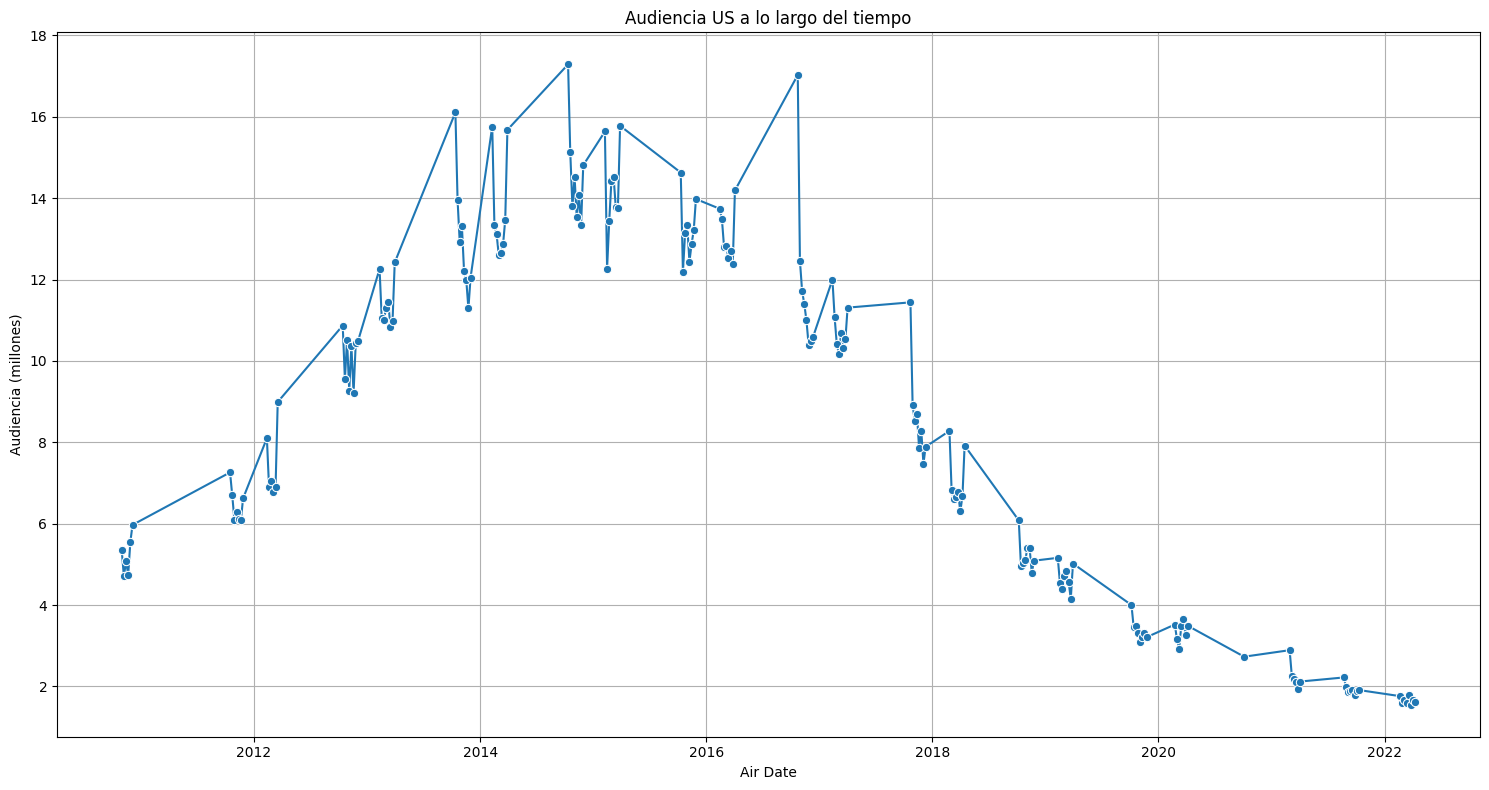

In [43]:
# Visualización de la audiencia a lo largo del tiempo, necesitamos convertir la fecha de emisión en un formato de fecha y luego graficarla.

# Convertir la columna 'Original Air date' en un formato de fecha
walking_dead_data['Original Air Date'] = pd.to_datetime(walking_dead_data['Original Air date'])

# Crear un gráfico de línea para mostrar la audiencia de cada episodio a lo largo del tiempo
plt.figure(figsize=(15, 8))
sns.lineplot(x='Original Air Date', y='US viewers(millions)', data=walking_dead_data, marker='o')
plt.title('Audiencia US a lo largo del tiempo')
plt.xlabel('Air Date')
plt.ylabel('Audiencia (millones)')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# En este grafico podemos notar que en las primeras temporadas, observamos que las temporadas empiezan con un nivel alto de audiencia, 
# en la mitad de la temporada baja y al ultimo de las temporadas vuelve a subir al audiencia, pero en unn punto en las ultimas 
# temporadas (desde año 2016) esta tendencia cambio, siendo el punto mas alto el primer capitulo, luego una notable bajada en la mitad de temporada 
# y manteniendose hasta el final de temporada.

In [44]:
#Nos fijaamos que los escritores debemos separarlos, mientras que los directores no (ya que aparecen de forma individual)
# Dividimos los escritores y realizar el análisis
# Usamos 'explode' directamente para manejar los escritores

# Dividir la columna de escritores y explotarla para tener una fila por cada escritor en un episodio
df_exploded_writers = walking_dead_data.assign(Writers=walking_dead_data['Written by'].str.split('&')).explode('Writers')
df_exploded_writers['Writers'] = df_exploded_writers['Writers'].str.strip()

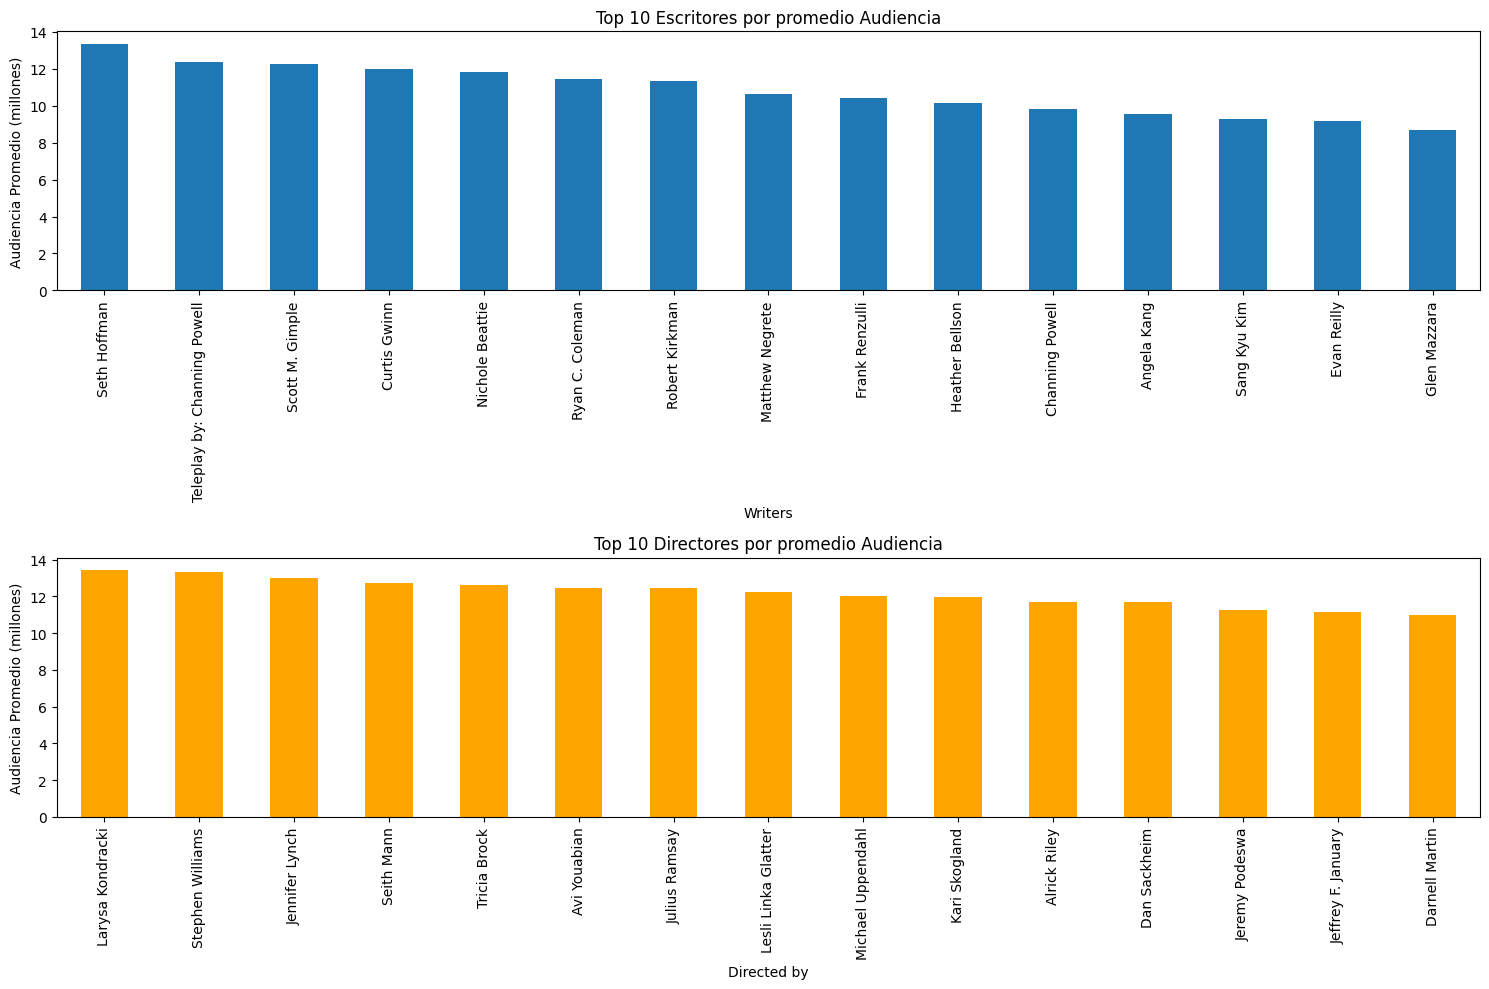

In [45]:
# Calculando la audiencia promedio para cada escritor
writer_audience_avg = df_exploded_writers.groupby('Writers')['US viewers(millions)'].mean().sort_values(ascending=False)

# Repitiendo el proceso para los directores
director_audience_avg = walking_dead_data.groupby('Directed by')['US viewers(millions)'].mean().sort_values(ascending=False)

# Visualizando los datos
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
writer_audience_avg.head(15).plot(kind='bar')
plt.title('Top 10 Escritores por promedio Audiencia')
plt.ylabel('Audiencia Promedio (millones)')

plt.subplot(2, 1, 2)
director_audience_avg.head(15).plot(kind='bar', color='orange')
plt.title('Top 10 Directores por promedio Audiencia')
plt.ylabel('Audiencia Promedio (millones)')

plt.tight_layout()
plt.show()

# Estas visualizaciones permiten comparar rápidamente escritores y directores están asociados con los episodios más vistos.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparación de datos
# Codificación one-hot de directores y escritores
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
directors_encoded = encoder.fit_transform(walking_dead_data[['Directed by']])

# Combinando las características codificadas con los datos originales
features_directors = np.concatenate([directors_encoded, walking_dead_data[['Season', 'Episode']]], axis=1)

# Audiencia como variable objetivo
target = walking_dead_data['US viewers(millions)'].values

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train_dir, X_test_dir, y_train, y_test = train_test_split(features_directors, target, test_size=0.2, random_state=42)

# Seleccionando y entrenando el modelo
# Aquí usaremos Random Forest como ejemplo
model_directors = RandomForestRegressor(random_state=42)

model_directors.fit(X_train_dir, y_train)

# Evaluando el modelo
y_pred_dir = model_directors.predict(X_test_dir)

rmse_dir = mean_squared_error(y_test, y_pred_dir, squared=False)
r2_dir = r2_score(y_test, y_pred_dir)

rmse_dir, r2_dir

(0.7521742902686687, 0.9684618559386923)

In [54]:
# RMSE (Raíz del Error Cuadrático Medio): 0.752 millones de espectadores. Esta métrica indica el error promedio del modelo en sus predicciones; 
# cuanto menor sea, mejor.

# R^2: 0.968. Este valor, cercano a 1, sugiere que el modelo es capaz de explicar un porcentaje muy alto de la variabilidad en la audiencia 
# basándose en los directores de los episodios.

# Estos resultados indican que el modelo es bastante preciso en predecir la audiencia de los episodios basándose en los directores. 
# Sin embargo, es importante recordar que estos resultados son específicos para este conjunto de datos y podrían variar con datos diferentes 
# o con la inclusión de variables adicionales, como los escritores.

In [59]:
walking_dead_data

,Season,Episode,Episode(overall),Title,Directed by,Written by,Original Air date,US viewers(millions),Overall Episode,Original Air Date
0,1,1,1,Days Gone Bye,Frank Darabont,Teleplay by: Frank Darabont,10/31/2010,5.35,1,2010-10-31
1,1,2,2,Guts,Michelle MacLaren,Frank Darabont,11/7/2010,4.71,2,2010-11-07
2,1,3,3,Tell It to the Frogs,Gwyneth Horder-Payton,Story by: Charles H. Eglee & Jack LoGiudice & ...,11/14/2010,5.07,3,2010-11-14
3,1,4,4,Vatos,Johan Renck,Robert Kirkman,11/21/2010,4.75,4,2010-11-21
4,1,5,5,Wildfire,Ernest Dickerson,Glen Mazzara,11/28/2010,5.56,5,2010-11-28
...,...,...,...,...,...,...,...,...,...,...
164,11,12,165,The Lucky Ones,Tawnia McKiernan,Vivian Tse,3/13/2022,1.58,12,2022-03-13
165,11,13,166,Warlords,Loren Yaconelli,Jim Barnes & Erik Mountain,3/20/2022,1.79,13,2022-03-20
166,11,14,167,The Rotten Core,Marcus Stokes,Erik Mountain & Jim Barnes,3/27/2022,1.55,14,2022-03-27
167,11,15,168,Trust,Lily Mariye,Kevin Deiboldt,4/3/2022,1.67,15,2022-04-03


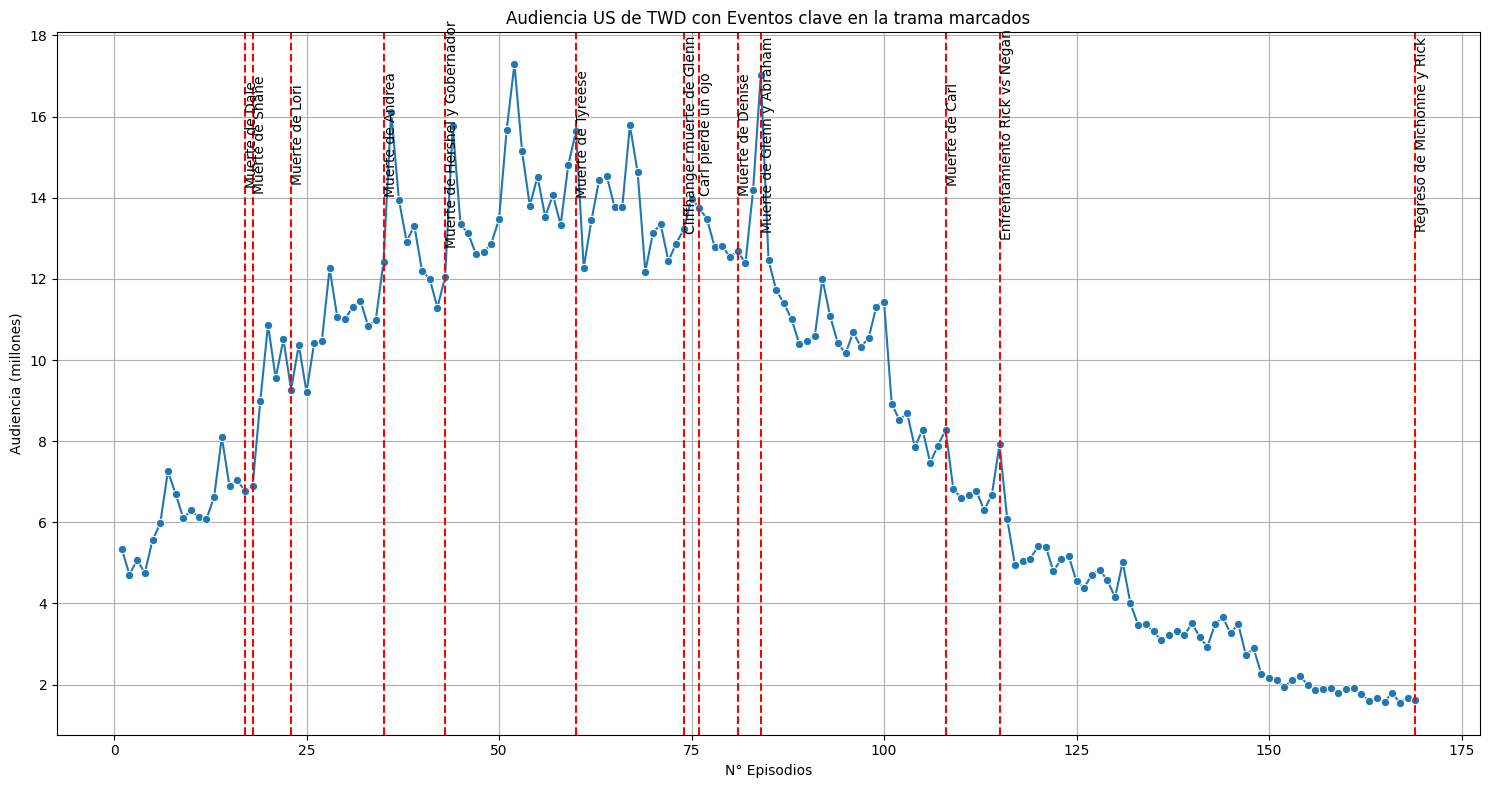

In [75]:
# Incorporamos al analisis de popularidad la presencia de eventos importantes en la serie

# Corrigiendo la ubicación de los eventos importantes en el gráfico

# Calculando el número total de episodio para cada evento
def calculate_total_episode_number(season, episode):
    return walking_dead_data[(walking_dead_data['Season'] < season) | ((walking_dead_data['Season'] == season) & (walking_dead_data['Episode'] <= episode))]['Episode'].count()

event_episodes_corrected = [
    (6, 9, 'Carl pierde un ojo', calculate_total_episode_number(6, 9)),
    (8, 16, 'Enfrentamiento Rick vs Negan', calculate_total_episode_number(8, 16)),
    (6, 7, 'Cliffhanger muerte de Glenn', calculate_total_episode_number(6, 7)),
    (7, 1, 'Muerte de Glenn y Abraham', calculate_total_episode_number(7, 1)),
    (8, 9, 'Muerte de Carl', calculate_total_episode_number(8, 9)),
    (2, 12, 'Muerte de Shane', calculate_total_episode_number(2, 12)),
    (2, 11, 'Muerte de Dale', calculate_total_episode_number(2, 11)),
    (3, 4, 'Muerte de Lori', calculate_total_episode_number(3, 4)),
    (3, 16, 'Muerte de Andrea', calculate_total_episode_number(3, 16)),
    (4, 8, 'Muerte de Hershel y Gobernador', calculate_total_episode_number(4, 8)),
    (5, 9, 'Muerte de Tyreese', calculate_total_episode_number(5, 9)),
    (6, 14, 'Muerte de Denise', calculate_total_episode_number(6, 14)),
    (11, 25, 'Regreso de Michonne y Rick', calculate_total_episode_number(11, 25))
]

# Creando nuevamente el gráfico con los eventos correctamente ubicados
plt.figure(figsize=(15, 8))
sns.lineplot(x='Episode(overall)', y='US viewers(millions)', data=walking_dead_data, marker='o')

# Marcando los eventos importantes con su ubicación corregida
for season, episode, event, total_ep in event_episodes_corrected:
    plt.axvline(x=total_ep, color='red', linestyle='--')
    plt.text(total_ep, walking_dead_data['US viewers(millions)'].max() * 0.9, event, rotation=90, verticalalignment='center')

plt.title('Audiencia US de TWD con Eventos clave en la trama marcados')
plt.xlabel('N° Episodios')
plt.ylabel('Audiencia (millones)')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Podemos observar que claramente algunos de los eventos importantes han sido clave para ciertos aumentos y descensos de la audiencia de la serie.